# Pandas教程


### 2017七月在线 机器学习线上集训 julyedu.com
by 褚则伟 

## 目录
- Group by
- Aggregate
- concat
- merge
- join
- bike project
- stocks project
- credit project

## Group By

### 2017七月在线 机器学习线上集训 julyedu.com

举个栗子，假设我们现在有一张公司每个员工的收入流水。

In [2]:
import pandas as pd
import numpy as np

In [3]:
salaries = pd.DataFrame({
    'Name': ['July', 'Zewei', 'Zewei', 'Han', 'July', 'July', 'Zewei', 'July'],
    'Year': [2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary': [10000,2000,4000,5000,18000,25000,3000,4000],
    'Bonus': [3000,1000,1000,1200,4000,2300,500,1000]
})
salaries

,Bonus,Name,Salary,Year
0,3000,July,10000,2016
1,1000,Zewei,2000,2016
2,1000,Zewei,4000,2016
3,1200,Han,5000,2016
4,4000,July,18000,2017
5,2300,July,25000,2017
6,500,Zewei,3000,2017
7,1000,July,4000,2017


接下来我给大家演示一下什么叫做Group By

In [15]:
group_by_name = salaries.groupby("Name")
group_by_name

groupby构造了一个GroupBy object，我们可以对这个object做各种操作

### groupby之后一般要做一些aggregate操作

In [6]:
group_by_name.sum()

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


In [8]:
group_by_name[["Salary", "Bonus"]].sum()

,Salary,Bonus
Name,,
Han,5000,1200
July,57000,10300
Zewei,9000,2500


groupby + aggregate

默认会排序，也可以选择不排序

In [11]:
salaries.groupby("Name", sort=False).sum()

,Bonus,Salary,Year
Name,,,
July,10300,57000,8067
Zewei,2500,9000,6049
Han,1200,5000,2016


也可以这么写

In [14]:
group_by_name.agg(sum)

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


group by的attributes

In [17]:
salaries

,Bonus,Name,Salary,Year
0,3000,July,10000,2016
1,1000,Zewei,2000,2016
2,1000,Zewei,4000,2016
3,1200,Han,5000,2016
4,4000,July,18000,2017
5,2300,July,25000,2017
6,500,Zewei,3000,2017
7,1000,July,4000,2017


In [16]:
group_by_name.groups

{'Han': Int64Index([3], dtype='int64'),
 'July': Int64Index([0, 4, 5, 7], dtype='int64'),
 'Zewei': Int64Index([1, 2, 6], dtype='int64')}

In [18]:
len(group_by_name)

3

用多个列groupby

In [19]:
groupby_name_year = salaries.groupby(["Name", "Year"])
groupby_name_year.sum()

Bonus  Salary
Name  Year               
Han   2016   1200    5000
July  2016   3000   10000
      2017   7300   47000
Zewei 2016   2000    6000
      2017    500    3000

除了sum之外，我们再来尝试一下size,mean,median 

In [20]:
groupby_name_year.size()

Name   Year
Han    2016    1
July   2016    1
       2017    3
Zewei  2016    2
       2017    1
dtype: int64

In [21]:
groupby_name_year.mean()

Bonus        Salary
Name  Year                           
Han   2016  1200.000000   5000.000000
July  2016  3000.000000  10000.000000
      2017  2433.333333  15666.666667
Zewei 2016  1000.000000   3000.000000
      2017   500.000000   3000.000000

In [25]:
group_by_name.describe()

Bonus                                                                    \
      count         mean          std     min     25%     50%     75%     max   
Name                                                                            
Han     1.0  1200.000000          NaN  1200.0  1200.0  1200.0  1200.0  1200.0   
July    4.0  2575.000000  1260.621540  1000.0  1975.0  2650.0  3250.0  4000.0   
Zewei   3.0   833.333333   288.675135   500.0   750.0  1000.0  1000.0  1000.0   

      Salary            ...                      Year                        \
       count     mean   ...        75%      max count         mean      std   
Name                    ...                                                   
Han      1.0   5000.0   ...     5000.0   5000.0   1.0  2016.000000      NaN   
July     4.0  14250.0   ...    19750.0  25000.0   4.0  2016.750000  0.50000   
Zewei    3.0   3000.0   ...     3500.0   4000.0   3.0  2016.333333  0.57735   

                                                
          min      25%     50%     75%     max  
Name                                            
Han    2016.0  2016.00  2016.0  2016.0  2016.0  
July   2016.0  2016.75  2017.0  2017.0  2017.0  
Zewei  2016.0  2016.00  2016.0  2016.5  2017.0  

[3 rows x 24 columns]

### iterate GroupBy object

In [27]:
for name, group in group_by_name:
    print(name)
    print(group)
    print(type(group))

Han
   Bonus Name  Salary  Year
3   1200  Han    5000  2016
<class 'pandas.core.frame.DataFrame'>
July
   Bonus  Name  Salary  Year
0   3000  July   10000  2016
4   4000  July   18000  2017
5   2300  July   25000  2017
7   1000  July    4000  2017
<class 'pandas.core.frame.DataFrame'>
Zewei
   Bonus   Name  Salary  Year
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
6    500  Zewei    3000  2017
<class 'pandas.core.frame.DataFrame'>


选择一个group

In [30]:
group_by_name.get_group("Zewei")

,Bonus,Salary,Year
1,1000,2000,2016
2,1000,4000,2016
6,500,3000,2017


In [36]:
groupby_name_year.agg([sum, np.mean, np.std])

Bonus                          Salary                            
             sum         mean         std    sum          mean           std
Name  Year                                                                  
Han   2016  1200  1200.000000         NaN   5000   5000.000000           NaN
July  2016  3000  3000.000000         NaN  10000  10000.000000           NaN
      2017  7300  2433.333333  1504.43788  47000  15666.666667  10692.676622
Zewei 2016  2000  1000.000000     0.00000   6000   3000.000000   1414.213562
      2017   500   500.000000         NaN   3000   3000.000000           NaN

### transform

In [40]:
nvda = pd.read_csv("data/NVDA.csv", index_col=0, parse_dates=["Date"])
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [42]:
key = lambda x: x.year

In [43]:
nvda.groupby(key).agg([np.mean, np.std]).head()

Open                 High                  Low            \
           mean       std       mean       std       mean       std   
1999   1.950782  0.588882   2.007317  0.614302   1.883559  0.571658   
2000   8.781084  2.999908   9.222697  3.114186   8.360522  2.904761   
2001  13.091254  3.839777  13.600750  3.829838  12.680548  3.830944   
2002   9.690344  6.561287   9.955093  6.664226   9.344391  6.375212   
2003   5.902434  1.461862   6.042659  1.491260   5.764960  1.423422   

          Close            Adj Close                  Volume                
           mean       std       mean       std          mean           std  
1999   1.947230  0.601041   1.808134  0.558107  6.433220e+06  8.142949e+06  
2000   8.778826  3.013104   8.151729  2.797869  1.104182e+07  7.985374e+06  
2001  13.181552  3.833637  12.239956  3.559789  2.782387e+07  1.384318e+07  
2002   9.614749  6.519053   8.927940  6.053379  3.168655e+07  1.558742e+07  
2003   5.900344  1.459852   5.478865  1.355570  2.430220e+07  1.899657e+07

In [44]:
zscore = lambda x: (x - x.mean()) / x.std()

In [46]:
transformed = nvda.groupby(key).transform(zscore)
transformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


In [47]:
%matplotlib inline

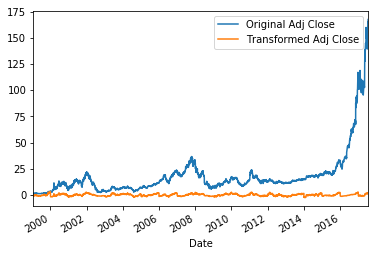

In [50]:
compare = pd.DataFrame({"Original Adj Close": nvda["Adj Close"], 
                       "Transformed Adj Close": transformed["Adj Close"]})

compare.plot()

In [60]:
#price_range = lambda x: x.max() - x.min()
def price_range(x):
    return x.max() - x.min()
nvda[["Adj Close", "Open"]].groupby(key).transform(price_range).head()

,Adj Close,Open
Date,,
1999-01-22,2.364945,2.552084
1999-01-25,2.364945,2.552084
1999-01-26,2.364945,2.552084
1999-01-27,2.364945,2.552084
1999-01-28,2.364945,2.552084


In [54]:
(nvda.groupby(key).transform("max") - nvda.groupby(key).transform("min")).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-25,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-26,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-27,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-28,2.552084,2.53125,2.510417,2.546875,2.364945,67375200


### concat, merge, join
### 2017七月在线 机器学习线上集训 julyedu.com
by 褚则伟 

In [55]:
df1 = pd.DataFrame({'apts': [55000, 60000],
                   'cars': [200000, 300000],},
                  index = ['Shanghai', 'Beijing'])
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [57]:
df2 = pd.DataFrame({'apts': [25000, 20000],
                   'cars': [150000, 120000],},
                  index = ['Hangzhou', 'Najing'])
print(df2)

           apts    cars
Hangzhou  25000  150000
Najing    20000  120000


In [62]:
df3 = pd.DataFrame({'apts': [30000, 10000],
                   'cars': [180000, 100000],},
                  index = ['Guangzhou', 'Chongqing'])
print(df3)

            apts    cars
Guangzhou  30000  180000
Chongqing  10000  100000


### concatenate

In [63]:
result = pd.concat([df1, df2, df3])
result

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000
Guangzhou,30000,180000
Chongqing,10000,100000


在concatenate的时候可以指定keys，这样可以给每一个部分加上一个Key。

以下的例子就构造了一个hierarchical index。

In [64]:
result2 = pd.concat([df1, df2, df3], keys=["x", "y", "z"])
result2

apts    cars
x Shanghai   55000  200000
  Beijing    60000  300000
y Hangzhou   25000  150000
  Najing     20000  120000
z Guangzhou  30000  180000
  Chongqing  10000  100000

In [65]:
result2.loc["y"]

,apts,cars
Hangzhou,25000,150000
Najing,20000,120000


如果要换个方向concat，只要声明axis就可以了

In [66]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index = ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [67]:
pd.concat([df1, df4])

,apts,cars,salaries
Shanghai,55000.0,200000.0,NaN
Beijing,60000.0,300000.0,NaN
Suzhou,NaN,NaN,10000.0
Beijing,NaN,NaN,30000.0
Shanghai,NaN,NaN,30000.0
Guangzhou,NaN,NaN,20000.0
Tianjin,NaN,NaN,15000.0


In [69]:
result3 = pd.concat([result, df4], axis=1)
result3

,apts,cars,salaries
Beijing,60000.0,300000.0,30000.0
Chongqing,10000.0,100000.0,NaN
Guangzhou,30000.0,180000.0,20000.0
Hangzhou,25000.0,150000.0,NaN
Najing,20000.0,120000.0,NaN
Shanghai,55000.0,200000.0,30000.0
Suzhou,NaN,NaN,10000.0
Tianjin,NaN,NaN,15000.0


用inner可以去掉NaN,也就是说如果出现了不匹配的行就会被忽略

In [71]:
result4 = pd.concat([result, df4], axis=1, join="inner")
result4

,apts,cars,salaries
Shanghai,55000,200000,30000
Beijing,60000,300000,30000
Guangzhou,30000,180000,20000


如果我们只想保留左边部分的index呢

In [77]:
result5 = pd.concat([result, df4], axis=1)
result5

,apts,cars,salaries
Beijing,60000.0,300000.0,30000.0
Chongqing,10000.0,100000.0,NaN
Guangzhou,30000.0,180000.0,20000.0
Hangzhou,25000.0,150000.0,NaN
Najing,20000.0,120000.0,NaN
Shanghai,55000.0,200000.0,30000.0
Suzhou,NaN,NaN,10000.0
Tianjin,NaN,NaN,15000.0


右边部分

#### 用[```append```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html)来做concatenation 

In [78]:
df1.append(df2)

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000


In [79]:
df1.append(df4)

,apts,cars,salaries
Shanghai,55000.0,200000.0,NaN
Beijing,60000.0,300000.0,NaN
Suzhou,NaN,NaN,10000.0
Beijing,NaN,NaN,30000.0
Shanghai,NaN,NaN,30000.0
Guangzhou,NaN,NaN,20000.0
Tianjin,NaN,NaN,15000.0


In [80]:
df1.append([df2, df3])

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000
Guangzhou,30000,180000
Chongqing,10000,100000


Series和DataFrame还可以被一起concatenate，这时候Series会先被转成DataFrame然后做Join，因为Series本来就是一个只有一维的DataFrame对吧。

In [81]:
s1 = pd.Series([60, 50], index=["Shanghai", "Beijing"], name="meal")
print(s1)

Shanghai    60
Beijing     50
Name: meal, dtype: int64


In [83]:
pd.concat([df1, s1], axis=1)

,apts,cars,meal
Shanghai,55000,200000,60
Beijing,60000,300000,50


下面讲如何append一个row到DataFrame里。

In [84]:
s2 = pd.Series([18000, 12000], index=["apts", "cars"], name="Xiamen")
s2

apts    18000
cars    12000
Name: Xiamen, dtype: int64

In [85]:
df1.append(s2)

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Xiamen,18000,12000


In [87]:
type(s2.to_frame())

pandas.core.frame.DataFrame

### Merge(Join)
### 2017七月在线 机器学习线上集训 julyedu.com

In [91]:
result = result.reset_index().rename(columns={"index": "city"})
result

,city,apts,cars
0,Shanghai,55000,200000
1,Beijing,60000,300000
2,Hangzhou,25000,150000
3,Najing,20000,120000
4,Guangzhou,30000,180000
5,Chongqing,10000,100000


In [94]:
df4 = df4.reset_index().rename(columns={"index":"city"})
df4

,city,salaries
0,Suzhou,10000
1,Beijing,30000
2,Shanghai,30000
3,Guangzhou,20000
4,Tianjin,15000


In [96]:
pd.merge(result, df4, on="city")

,city,apts,cars,salaries
0,Shanghai,55000,200000,30000
1,Beijing,60000,300000,30000
2,Guangzhou,30000,180000,20000


In [99]:
pd.merge(result, df4, on="city", how="right")

,city,apts,cars,salaries
0,Shanghai,55000.0,200000.0,30000
1,Beijing,60000.0,300000.0,30000
2,Guangzhou,30000.0,180000.0,20000
3,Suzhou,NaN,NaN,10000
4,Tianjin,NaN,NaN,15000


#### join on index

In [100]:
df1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000


In [102]:
df4 = df4.set_index("city")
df4

,salaries
city,
Suzhou,10000
Beijing,30000
Shanghai,30000
Guangzhou,20000
Tianjin,15000


In [103]:
df1.join(df4)

,apts,cars,salaries
Shanghai,55000,200000,30000
Beijing,60000,300000,30000


In [107]:
df1.join(df4, how="right")

,apts,cars,salaries
city,,,
Suzhou,NaN,NaN,10000
Beijing,60000.0,300000.0,30000
Shanghai,55000.0,200000.0,30000
Guangzhou,NaN,NaN,20000
Tianjin,NaN,NaN,15000


也可以用merge来写

In [110]:
pd.merge(df1, df4, left_index=True, right_index=True, how="outer")

,apts,cars,salaries
Beijing,60000.0,300000.0,30000
Guangzhou,NaN,NaN,20000
Shanghai,55000.0,200000.0,30000
Suzhou,NaN,NaN,10000
Tianjin,NaN,NaN,15000


### bikes project

我们先从CSV文件中读取一些数据。

bike.csv记录了Montreal自行车路线的数据，具体有7条路线，数据记录了每条自行车路线每天分别有多少人。

In [117]:
bikes = pd.read_csv("data/bikes.csv", encoding="latin-1", sep=";", \
                    parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


[```dropna```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)会删除所有带NA的行

In [118]:
bikes.dropna()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,


删太多了，我们只想删掉全部都是NA的行

In [121]:
bikes.dropna(axis=1, how="all").head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [122]:
bikes.shape

(310, 9)

我们数一数每一列有多少数据缺失

In [123]:
bikes.apply(lambda x: sum(x.isnull()))

Berri 1                                  0
Brébeuf (données non disponibles)      310
Côte-Sainte-Catherine                    0
Maisonneuve 1                            0
Maisonneuve 2                            0
du Parc                                  0
Pierre-Dupuy                             0
Rachel1                                  0
St-Urbain (données non disponibles)    310
dtype: int64

In [125]:
bikes.isnull().sum()

Berri 1                                  0
Brébeuf (données non disponibles)      310
Côte-Sainte-Catherine                    0
Maisonneuve 1                            0
Maisonneuve 2                            0
du Parc                                  0
Pierre-Dupuy                             0
Rachel1                                  0
St-Urbain (données non disponibles)    310
dtype: int64

下面给大家介绍如何填充缺失的数据

In [129]:
row = bikes.iloc[0].copy()
row.fillna(row.mean())

Berri 1                                35.000000
Brébeuf (données non disponibles)      25.142857
Côte-Sainte-Catherine                   0.000000
Maisonneuve 1                          38.000000
Maisonneuve 2                          51.000000
du Parc                                26.000000
Pierre-Dupuy                           10.000000
Rachel1                                16.000000
St-Urbain (données non disponibles)    25.142857
Name: 2012-01-01 00:00:00, dtype: float64

In [131]:
m = bikes.mean(axis=1)
for i, col in enumerate(bikes):
    bikes.iloc[:, i] = bikes.iloc[:, i].fillna(m)
    
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,25.142857,0,38,51,26,10,16,25.142857
2012-01-02,83,58.142857,1,68,153,53,6,43,58.142857
2012-01-03,135,91.285714,2,104,248,89,3,58,91.285714
2012-01-04,144,108.428571,1,116,318,111,8,61,108.428571
2012-01-05,197,122.571429,2,124,330,97,13,95,122.571429


In [132]:
bikes[:5]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,25.142857,0,38,51,26,10,16,25.142857
2012-01-02,83,58.142857,1,68,153,53,6,43,58.142857
2012-01-03,135,91.285714,2,104,248,89,3,58,91.285714
2012-01-04,144,108.428571,1,116,318,111,8,61,108.428571
2012-01-05,197,122.571429,2,124,330,97,13,95,122.571429


In [134]:
berri_bikes = bikes[["Berri 1"]].copy()
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [138]:
berri_bikes["weekday"] = berri_bikes.index.weekday
berri_bikes.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


In [141]:
weekday_counts = berri_bikes.groupby("weekday").sum()
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [142]:
weekday_counts.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
weekday_counts

,Berri 1
Mon,134298
Tue,135305
Wed,152972
Thu,160131
Fri,141771
Sat,101578
Sun,99310


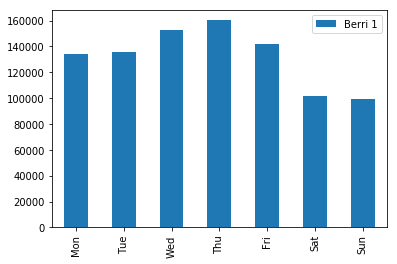

In [144]:
weekday_counts.plot(kind="bar")

有了weekday信息之后，我们就可以用上我们前面学过的.groupyby把骑车人数按照weekday分类，然后用aggregate算出每个工作日的骑车人数之和。

接下来我们试试能不能把每条路线都加起来，然后算出一天骑自行车出门的人数之和。
to_frame可以把一个Series转换成一个DataFrame

In [148]:
bikes_sum = bikes.sum(axis=1).to_frame()
bikes_sum.head()

,0
Date,
2012-01-01,226.285714
2012-01-02,523.285714
2012-01-03,821.571429
2012-01-04,975.857143
2012-01-05,1103.142857


In [149]:
bikes_sum["weekday"] = bikes_sum.index.weekday
bikes_sum.head()

,0,weekday
Date,,
2012-01-01,226.285714,6
2012-01-02,523.285714,0
2012-01-03,821.571429,1
2012-01-04,975.857143,2
2012-01-05,1103.142857,3


In [150]:
weekday_counts = bikes_sum.groupby("weekday").sum()
weekday_counts.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
weekday_counts

,0
Mon,9.192381e+05
Tue,8.981769e+05
Wed,1.015357e+06
Thu,1.065946e+06
Fri,9.498497e+05
Sat,6.643299e+05
Sun,6.660604e+05


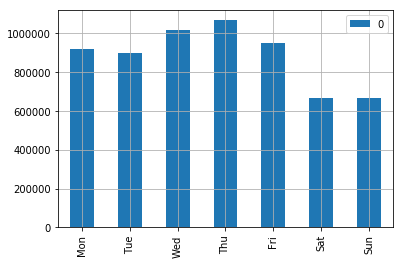

In [153]:
weekday_counts.plot(kind="bar", grid=True)

作个简单的图看一看
[plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

### 2017七月在线 机器学习线上集训 julyedu.com

### stock project

[stock analysis](https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/)

In [156]:
goog = pd.read_csv("data/GOOG.csv", index_col=0, parse_dates=["Date"])
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


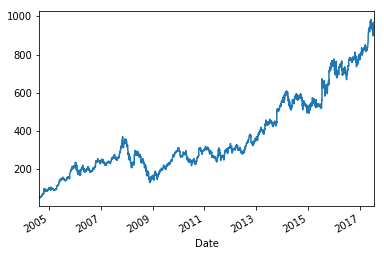

In [158]:
goog["Adj Close"].plot()

In [ ]:
# log return = log(today's price / yesterday's price)

```shift```这个function可以帮我们移动时间

In [159]:
goog.shift(1).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,49.813286,51.835709,47.800831,49.982655,49.982655,44871300.0
2004-08-23,50.316402,54.336334,50.062355,53.952770,53.952770,22942800.0
2004-08-24,55.168217,56.528118,54.321388,54.495735,54.495735,18342800.0
2004-08-25,55.412300,55.591629,51.591621,52.239193,52.239193,15319700.0


In [160]:
goog["log-return"] = np.log(goog["Adj Close"] / goog["Adj Close"].shift(1))
goog["log-return"].head()

Date
2004-08-19         NaN
2004-08-20    0.076433
2004-08-23    0.010013
2004-08-24   -0.042289
2004-08-25    0.010718
Name: log-return, dtype: float64

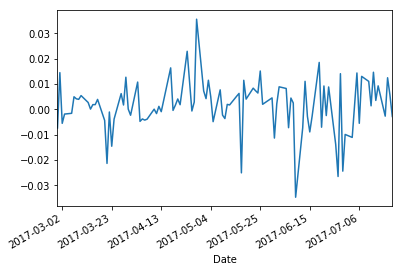

In [162]:
goog["log-return"].iloc[-100:].plot()

In [164]:
aapl = pd.read_csv("data/AAPL.csv", index_col=0, parse_dates=["Date"])
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.423252,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.401170,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.371726,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.380927,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.391969,18362400


In [174]:
aapl[aapl == "null"] = np.NaN
aapl.iloc[160:170]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-08-03,0.446429,0.446429,0.441964,0.441964,0.364365,3108000
1981-08-04,0.448661,0.450893,0.448661,0.448661,0.369886,7918400
1981-08-05,0.462054,0.464286,0.462054,0.462054,0.380927,4373600
1981-08-06,0.453125,0.453125,0.450893,0.450893,0.371726,2632000
1981-08-07,0.450893,0.453125,0.450893,0.450893,0.371726,2301600
1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN
1981-08-11,0.441964,0.441964,0.437500,0.437500,0.360685,17864000
1981-08-12,0.430804,0.430804,0.428571,0.428571,0.353324,6568800
1981-08-13,0.417411,0.417411,0.415179,0.415179,0.342283,6871200


In [175]:
aapl = aapl.ffill()
aapl.iloc[160:170]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-08-03,0.446429,0.446429,0.441964,0.441964,0.364365,3108000
1981-08-04,0.448661,0.450893,0.448661,0.448661,0.369886,7918400
1981-08-05,0.462054,0.464286,0.462054,0.462054,0.380927,4373600
1981-08-06,0.453125,0.453125,0.450893,0.450893,0.371726,2632000
1981-08-07,0.450893,0.453125,0.450893,0.450893,0.371726,2301600
1981-08-10,0.450893,0.453125,0.450893,0.450893,0.371726,2301600
1981-08-11,0.441964,0.441964,0.437500,0.437500,0.360685,17864000
1981-08-12,0.430804,0.430804,0.428571,0.428571,0.353324,6568800
1981-08-13,0.417411,0.417411,0.415179,0.415179,0.342283,6871200


In [181]:
for i, val in enumerate(aapl):
    aapl[val] = pd.to_numeric(aapl[val])

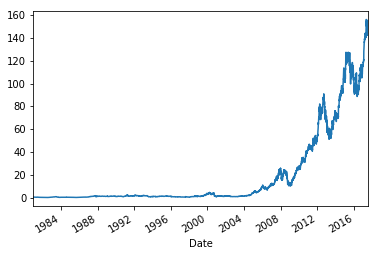

In [183]:
aapl["Adj Close"].plot()

In [184]:
msft = pd.read_csv("data/MSFT.csv", index_col=0, parse_dates=["Date"])
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.065242,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.067572,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.068737,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.066990,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.065825,47894400


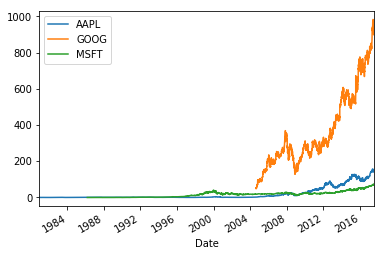

In [185]:
stocks = pd.DataFrame({"AAPL": aapl["Adj Close"],
                      "MSFT": msft["Adj Close"],
                      "GOOG": goog["Adj Close"]})
stocks.plot()

In [189]:
valid_stocks = stocks[stocks.index >= stocks["GOOG"].first_valid_index()]

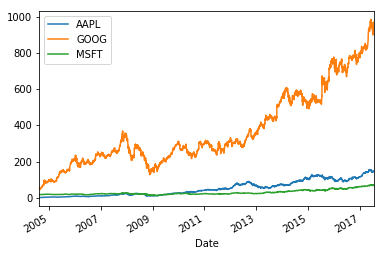

In [190]:
valid_stocks.plot()

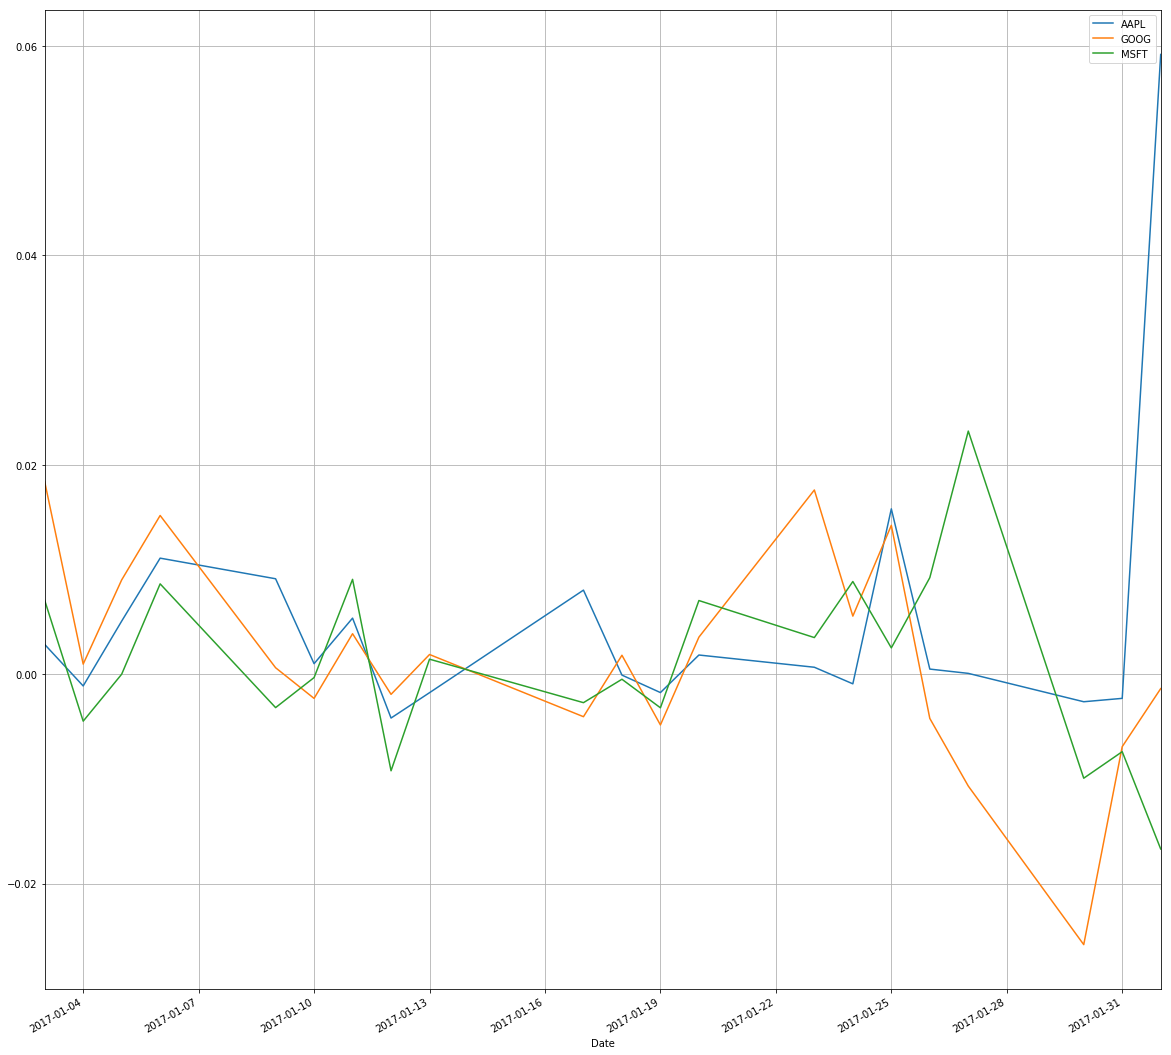

In [193]:
valid_stocks_lr = np.log(valid_stocks / valid_stocks.shift(1))
valid_stocks_lr.loc["2017-01-01":"2017-02-01"].plot(grid=True, figsize=(20, 20))

datetime indexing

### 下面我们试试能不能把日K图变成月K图

In [196]:
monthly_stocks = valid_stocks.groupby([valid_stocks.index.year, valid_stocks.index.month]).last()
monthly_stocks.head()

AAPL       GOOG       MSFT
Date Date                                
2004 8     2.225070  50.993862  18.536587
     9     2.499898  64.558022  18.774242
     10    3.380507  94.964050  18.991516
     11    4.325631  90.650223  20.288960
     12    4.154669  96.035034  20.220860

In [202]:
index = pd.PeriodIndex([ str(year) + "-" + str(month) \
                for year, month in monthly_stocks.index.values], freq="M")
monthly_stocks.index = index
monthly_stocks.head()

,AAPL,GOOG,MSFT
2004-08,2.225070,50.993862,18.536587
2004-09,2.499898,64.558022,18.774242
2004-10,3.380507,94.964050,18.991516
2004-11,4.325631,90.650223,20.288960
2004-12,4.154669,96.035034,20.220860


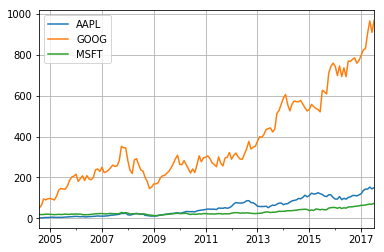

In [203]:
monthly_stocks.plot(grid=True)

## 特征处理


更多资料参考寒小阳的教程[link](https://github.com/HanXiaoyang/Feature_Engineering_and_XGBoost_Parameter_Tuning/blob/master/Feature%20Engineering.ipynb)

In [204]:
df = pd.read_csv("data/credit-data.csv")
df.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [205]:
for i, val in enumerate(df):
    print(val)
    print(df[val].value_counts())

serious_dlqin2yrs
0    104905
1      7510
Name: serious_dlqin2yrs, dtype: int64
revolving_utilization_of_unsecured_lines
0.000000    8154
1.000000    7651
1.000000      13
0.950100       6
0.982004       4
0.717131       4
0.004999       4
0.120879       4
0.988024       4
0.921079       4
0.990033       4
0.003650       4
0.857143       4
0.076923       4
0.017849       4
0.002500       4
0.017749       4
0.912176       4
0.161677       4
0.000800       4
0.035964       4
0.538922       4
0.058941       4
0.007984       4
0.713147       4
0.018798       4
0.999001       4
0.992016       4
1.105788       4
0.147705       3
            ... 
0.129278       1
0.929222       1
0.043920       1
0.691795       1
0.067803       1
0.079228       1
0.081027       1
0.606954       1
0.016722       1
0.121215       1
0.006934       1
0.091811       1
0.329528       1
0.070119       1
0.440980       1
0.011720       1
0.410886       1
0.024189       1
0.995846       1
0.200634       1
0.046474    

In [206]:
df.monthly_income

0          9120.0
1          2600.0
2          3042.0
3         63588.0
4          3500.0
5          3500.0
6         23684.0
7          2500.0
8          6501.0
9         12454.0
10            0.0
11        11362.0
12         8800.0
13         3280.0
14          333.0
15        12300.0
16         3000.0
17         2500.0
18         4676.0
19         8333.0
20         2500.0
21         3400.0
22         4200.0
23          750.0
24        11000.0
25         4000.0
26         3400.0
27         1000.0
28         5700.0
29            1.0
           ...   
112385    18733.0
112386     1406.0
112387     2155.0
112388     7000.0
112389     5300.0
112390     3333.0
112391    11279.0
112392     4166.0
112393     3333.0
112394     2400.0
112395     2500.0
112396      924.0
112397    12000.0
112398     8800.0
112399     5666.0
112400    17200.0
112401     4145.0
112402     1300.0
112403     9666.0
112404     6853.0
112405     2850.0
112406     3235.0
112407     2697.0
112408     3235.0
112409    

In [207]:
df.monthly_income = df.monthly_income.fillna(df.monthly_income.mean())

In [209]:
df["income_bins"] = np.log(df.monthly_income + 1e-9)

In [211]:
df["income_bins"] = df["income_bins"].astype("int")
df["income_bins"].head()

0     9
1     7
2     8
3    11
4     8
Name: income_bins, dtype: int32

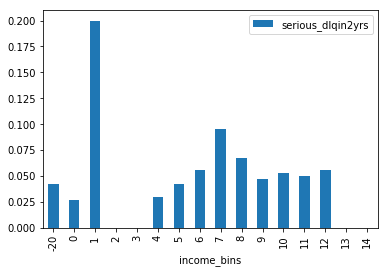

In [213]:
income_means = df[["income_bins", "serious_dlqin2yrs"]].groupby("income_bins").mean()
income_means.plot(kind="bar")

### [cut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)

把categorize的类型转换成数值类型